In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mawue28","key":"ab521ebb9bc23ad31592963604575e54"}'}

In [ ]:
 ! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download 'awsaf49/cbis-ddsm-breast-cancer-image-dataset'

100% 4.95G/4.95G [00:56<00:00, 149MB/s]
100% 4.95G/4.95G [00:56<00:00, 93.7MB/s]


In [ ]:
! unzip cbis-ddsm-breast-cancer-image-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: jpeg/1.3.6.1.4.1.9590.100.1.2.295326067813319071803507885093865003464/1-076.jpg  
  inflating: jpeg/1.3.6.1.4.1.9590.100.1.2.295334798611650724727702371150477767947/1-265.jpg  
  inflating: jpeg/1.3.6.1.4.1.9590.100.1.2.295334798611650724727702371150477767947/2-266.jpg  
  inflating: jpeg/1.3.6.1.4.1.9590.100.1.2.295360926313492745441868049270168300162/1-067.jpg  
  inflating: jpeg/1.3.6.1.4.1.9590.100.1.2.295394441612082321922200964343746626621/1-002.jpg  
  inflating: jpeg/1.3.6.1.4.1.9590.100.1.2.295397487412067903910787953980192002590/1-233.jpg  
  inflating: jpeg/1.3.6.1.4.1.9590.100.1.2.295400289412664594307776853882592114725/1-294.jpg  
  inflating: jpeg/1.3.6.1.4.1.9590.100.1.2.295400289412664594307776853882592114725/2-223.jpg  
  inflating: jpeg/1.3.6.1.4.1.9590.100.1.2.295438974411063274614777547962485322182/1-013.jpg  
  inflating: jpeg/1.3.6.1.4.1.9590.100.1.2.295438974411063274614777547962485322182/2-012.jpg  

In [ ]:
import pandas as pd
import numpy as np
import cv2
import PIL
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import glob
import random
import os
from os import listdir
random.seed(100)
np.random.seed(100)

In [ ]:
dicom_data = pd.read_csv('csv/dicom_info.csv')
dicom_data.head()

,file_path,image_path,AccessionNumber,BitsAllocated,BitsStored,BodyPartExamined,Columns,ContentDate,ContentTime,ConversionType,...,SecondaryCaptureDeviceManufacturerModelName,SeriesDescription,SeriesInstanceUID,SeriesNumber,SmallestImagePixelValue,SpecificCharacterSet,StudyDate,StudyID,StudyInstanceUID,StudyTime
0,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...,NaN,16,16,BREAST,351,20160426,131732.685,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.129308726812851964007...,1,23078,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.271867287611061855725...,214951.0
1,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24838...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...,NaN,16,16,BREAST,3526,20160426,143829.101,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.248386742010678582309...,1,0,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.161516517311681906612...,193426.0
2,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.26721...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...,NaN,16,16,BREAST,1546,20160503,111956.298,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.267213171011171858918...,1,0,ISO_IR 100,20160807.0,DDSM,1.3.6.1.4.1.9590.100.1.2.291043622711253836701...,161814.0
3,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,16,16,BREAST,97,20160503,115347.770,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,32298,ISO_IR 100,20170829.0,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,180109.0
4,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,8,8,Left Breast,3104,20160503,115347.770,WSD,...,MATLAB,NaN,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,0,ISO_IR 100,NaN,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,NaN


In [ ]:
dicom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10237 entries, 0 to 10236
Data columns (total 38 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   file_path                                    10237 non-null  object 
 1   image_path                                   10237 non-null  object 
 2   AccessionNumber                              0 non-null      float64
 3   BitsAllocated                                10237 non-null  int64  
 4   BitsStored                                   10237 non-null  int64  
 5   BodyPartExamined                             10237 non-null  object 
 6   Columns                                      10237 non-null  int64  
 7   ContentDate                                  10237 non-null  int64  
 8   ContentTime                                  10237 non-null  float64
 9   ConversionType                               10237 non-null  object 
 10

In [ ]:
cropped_images=dicom_data[dicom_data.SeriesDescription == 'cropped images'].image_path
cropped_images.head()

0     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...
3     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...
6     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.153339...
7     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.178994...
10    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.411833...
Name: image_path, dtype: object

In [ ]:
image_dir = 'jpeg'

In [ ]:
cropped_images = cropped_images.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
cropped_images.head()

0     jpeg/1.3.6.1.4.1.9590.100.1.2.1293087268128519...
3     jpeg/1.3.6.1.4.1.9590.100.1.2.3811873696115245...
6     jpeg/1.3.6.1.4.1.9590.100.1.2.1533390529131213...
7     jpeg/1.3.6.1.4.1.9590.100.1.2.1789947146114851...
10    jpeg/1.3.6.1.4.1.9590.100.1.2.4118334926123736...
Name: image_path, dtype: object

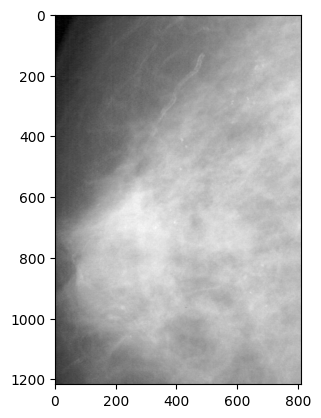

In [ ]:
for file  in cropped_images[0:5]:
  cropped_images_show = PIL.Image.open(file)
  gray_img= cropped_images_show.convert("L")
  plt.imshow(gray_img, cmap='gray')

In [ ]:
full_mammogram_images=dicom_data[dicom_data.SeriesDescription == 'full mammogram images'].image_path
full_mammogram_images.head()

1     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...
2     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...
11    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.210396...
12    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.749566...
15    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.987658...
Name: image_path, dtype: object

In [ ]:
full_mammogram_images = full_mammogram_images.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
full_mammogram_images.head()

1     jpeg/1.3.6.1.4.1.9590.100.1.2.2483867420106785...
2     jpeg/1.3.6.1.4.1.9590.100.1.2.2672131710111718...
11    jpeg/1.3.6.1.4.1.9590.100.1.2.2103968939112343...
12    jpeg/1.3.6.1.4.1.9590.100.1.2.7495665831138395...
15    jpeg/1.3.6.1.4.1.9590.100.1.2.9876588541294641...
Name: image_path, dtype: object

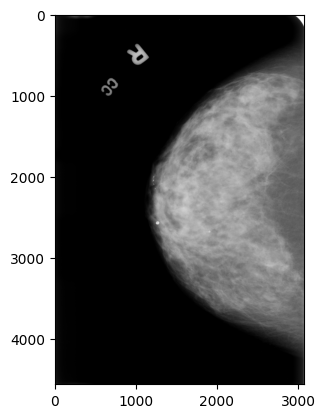

In [ ]:
for file  in full_mammogram_images[0:5]:
  full_mammogram_images_show = PIL.Image.open(file)
  gray_img= full_mammogram_images_show.convert("L")
  plt.imshow(gray_img, cmap='gray')

In [ ]:
ROI_mask_images=dicom_data[dicom_data.SeriesDescription == 'ROI mask images'].image_path
ROI_mask_images.head()

5     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.153339...
8     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.178994...
9     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.411833...
14    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.236373...
20    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.357008...
Name: image_path, dtype: object

In [ ]:
ROI_mask_images = ROI_mask_images.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
ROI_mask_images.head()

5     jpeg/1.3.6.1.4.1.9590.100.1.2.1533390529131213...
8     jpeg/1.3.6.1.4.1.9590.100.1.2.1789947146114851...
9     jpeg/1.3.6.1.4.1.9590.100.1.2.4118334926123736...
14    jpeg/1.3.6.1.4.1.9590.100.1.2.2363735487129941...
20    jpeg/1.3.6.1.4.1.9590.100.1.2.3570080504125347...
Name: image_path, dtype: object

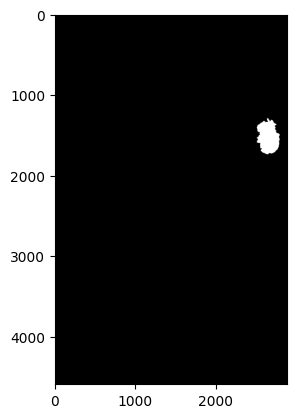

In [ ]:
for file  in ROI_mask_images[0:5]:
  ROI_mask_images_show = PIL.Image.open(file)
  gray_img= ROI_mask_images_show.convert("L")
  plt.imshow(gray_img, cmap='gray')

In [ ]:
data_1=pd.read_csv('csv/calc_case_description_train_set.csv')
data_1.head()

,patient_id,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00005,3,RIGHT,CC,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc-Training_P_00005_RIGHT_CC/1.3.6.1.4.1.959...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...
1,P_00005,3,RIGHT,MLO,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc-Training_P_00005_RIGHT_MLO/1.3.6.1.4.1.95...,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....
2,P_00007,4,LEFT,CC,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,Calc-Training_P_00007_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00007,4,LEFT,MLO,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,Calc-Training_P_00007_LEFT_MLO/1.3.6.1.4.1.959...,Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...,Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00008,1,LEFT,CC,1,calcification,NaN,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,3,Calc-Training_P_00008_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...


In [ ]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1546 entries, 0 to 1545
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               1546 non-null   object
 1   breast density           1546 non-null   int64 
 2   left or right breast     1546 non-null   object
 3   image view               1546 non-null   object
 4   abnormality id           1546 non-null   int64 
 5   abnormality type         1546 non-null   object
 6   calc type                1526 non-null   object
 7   calc distribution        1170 non-null   object
 8   assessment               1546 non-null   int64 
 9   pathology                1546 non-null   object
 10  subtlety                 1546 non-null   int64 
 11  image file path          1546 non-null   object
 12  cropped image file path  1546 non-null   object
 13  ROI mask file path       1546 non-null   object
dtypes: int64(4), object(10)
memory usage: 16

In [ ]:
data_1.describe()

,breast density,abnormality id,assessment,subtlety
count,1546.000000,1546.000000,1546.000000,1546.000000
mean,2.663648,1.415265,3.258732,3.411384
std,0.937219,0.903571,1.229231,1.179754
min,1.000000,1.000000,0.000000,1.000000
25%,2.000000,1.000000,2.000000,3.000000
50%,3.000000,1.000000,4.000000,3.000000
75%,3.000000,1.000000,4.000000,4.000000
max,4.000000,7.000000,5.000000,5.000000


In [ ]:
data_2=pd.read_csv('csv/mass_case_description_train_set.csv')
data_2.head()

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....


In [ ]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1318 entries, 0 to 1317
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               1318 non-null   object
 1   breast_density           1318 non-null   int64 
 2   left or right breast     1318 non-null   object
 3   image view               1318 non-null   object
 4   abnormality id           1318 non-null   int64 
 5   abnormality type         1318 non-null   object
 6   mass shape               1314 non-null   object
 7   mass margins             1275 non-null   object
 8   assessment               1318 non-null   int64 
 9   pathology                1318 non-null   object
 10  subtlety                 1318 non-null   int64 
 11  image file path          1318 non-null   object
 12  cropped image file path  1318 non-null   object
 13  ROI mask file path       1318 non-null   object
dtypes: int64(4), object(10)
memory usage: 14

In [ ]:
data_2.describe()

,breast_density,abnormality id,assessment,subtlety
count,1318.000000,1318.000000,1318.000000,1318.000000
mean,2.203338,1.116085,3.504552,3.965857
std,0.873774,0.467013,1.414609,1.102032
min,1.000000,1.000000,0.000000,0.000000
25%,2.000000,1.000000,3.000000,3.000000
50%,2.000000,1.000000,4.000000,4.000000
75%,3.000000,1.000000,4.000000,5.000000
max,4.000000,6.000000,5.000000,5.000000


In [ ]:
dicom_cleaning_data = dicom_data.copy()
dicom_cleaning_data.head()

,file_path,image_path,AccessionNumber,BitsAllocated,BitsStored,BodyPartExamined,Columns,ContentDate,ContentTime,ConversionType,...,SecondaryCaptureDeviceManufacturerModelName,SeriesDescription,SeriesInstanceUID,SeriesNumber,SmallestImagePixelValue,SpecificCharacterSet,StudyDate,StudyID,StudyInstanceUID,StudyTime
0,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...,NaN,16,16,BREAST,351,20160426,131732.685,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.129308726812851964007...,1,23078,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.271867287611061855725...,214951.0
1,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24838...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...,NaN,16,16,BREAST,3526,20160426,143829.101,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.248386742010678582309...,1,0,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.161516517311681906612...,193426.0
2,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.26721...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...,NaN,16,16,BREAST,1546,20160503,111956.298,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.267213171011171858918...,1,0,ISO_IR 100,20160807.0,DDSM,1.3.6.1.4.1.9590.100.1.2.291043622711253836701...,161814.0
3,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,16,16,BREAST,97,20160503,115347.770,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,32298,ISO_IR 100,20170829.0,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,180109.0
4,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,8,8,Left Breast,3104,20160503,115347.770,WSD,...,MATLAB,NaN,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,0,ISO_IR 100,NaN,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,NaN


In [ ]:
dicom_cleaning_data.drop(['PatientBirthDate','AccessionNumber','Columns','ContentDate','ContentTime','PatientSex','PatientBirthDate',
                                                'ReferringPhysicianName','Rows','SOPClassUID','SOPInstanceUID',
                                                'StudyDate','StudyID','StudyInstanceUID','StudyTime','InstanceNumber','SeriesInstanceUID','SeriesNumber'],axis =1, inplace=True)

In [ ]:
dicom_cleaning_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10237 entries, 0 to 10236
Data columns (total 21 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   file_path                                    10237 non-null  object
 1   image_path                                   10237 non-null  object
 2   BitsAllocated                                10237 non-null  int64 
 3   BitsStored                                   10237 non-null  int64 
 4   BodyPartExamined                             10237 non-null  object
 5   ConversionType                               10237 non-null  object
 6   HighBit                                      10237 non-null  int64 
 7   LargestImagePixelValue                       10237 non-null  int64 
 8   Laterality                                   9671 non-null   object
 9   Modality                                     10237 non-null  object
 10  PatientID 

In [ ]:
dicom_cleaning_data.isna().sum()

file_path                                        0
image_path                                       0
BitsAllocated                                    0
BitsStored                                       0
BodyPartExamined                                 0
ConversionType                                   0
HighBit                                          0
LargestImagePixelValue                           0
Laterality                                     566
Modality                                         0
PatientID                                        0
PatientName                                      0
PatientOrientation                               0
PhotometricInterpretation                        0
PixelRepresentation                              0
SamplesPerPixel                                  0
SecondaryCaptureDeviceManufacturer               0
SecondaryCaptureDeviceManufacturerModelName      0
SeriesDescription                              566
SmallestImagePixelValue        

In [ ]:
dicom_cleaning_data['SeriesDescription'].fillna(method = 'bfill', axis = 0, inplace=True)

In [ ]:
dicom_cleaning_data['Laterality'].fillna(method = 'bfill', axis = 0, inplace=True)

In [ ]:
dicom_cleaning_data.isna().sum()

file_path                                      0
image_path                                     0
BitsAllocated                                  0
BitsStored                                     0
BodyPartExamined                               0
ConversionType                                 0
HighBit                                        0
LargestImagePixelValue                         0
Laterality                                     0
Modality                                       0
PatientID                                      0
PatientName                                    0
PatientOrientation                             0
PhotometricInterpretation                      0
PixelRepresentation                            0
SamplesPerPixel                                0
SecondaryCaptureDeviceManufacturer             0
SecondaryCaptureDeviceManufacturerModelName    0
SeriesDescription                              0
SmallestImagePixelValue                        0
SpecificCharacterSet

In [ ]:
Data_cleaning_1 = data_1.copy()

In [ ]:
Data_cleaning_1 = Data_cleaning_1.rename(columns={'calc type':'calc_type'})

In [ ]:
Data_cleaning_1 = Data_cleaning_1.rename(columns={'calc distribution':'calc_distribution'})

In [ ]:
Data_cleaning_1 = Data_cleaning_1.rename(columns={'image view':'image_view'})

In [ ]:
Data_cleaning_1 = Data_cleaning_1.rename(columns={'left or right breast':'left_or_right_breast'})

In [ ]:
Data_cleaning_1 = Data_cleaning_1.rename(columns={'breast density':'breast_density'})

In [ ]:
Data_cleaning_1 = Data_cleaning_1.rename(columns={'abnormality type':'abnormality_type'})

In [ ]:
Data_cleaning_1['pathology'] = Data_cleaning_1['pathology'].astype('category')

In [ ]:
Data_cleaning_1['calc_type'] = Data_cleaning_1['calc_type'].astype('category')

In [ ]:
Data_cleaning_1['calc_distribution'] = Data_cleaning_1['calc_distribution'].astype('category')

In [ ]:
Data_cleaning_1['abnormality_type'] = Data_cleaning_1['abnormality_type'].astype('category')

In [ ]:
Data_cleaning_1['image_view'] = Data_cleaning_1['image_view'].astype('category')

In [ ]:
Data_cleaning_1['left_or_right_breast'] = Data_cleaning_1['left_or_right_breast'].astype('category')

In [ ]:
Data_cleaning_1.isna().sum()

patient_id                   0
breast_density               0
left_or_right_breast         0
image_view                   0
abnormality id               0
abnormality_type             0
calc_type                   20
calc_distribution          376
assessment                   0
pathology                    0
subtlety                     0
image file path              0
cropped image file path      0
ROI mask file path           0
dtype: int64

In [ ]:
Data_cleaning_1['calc_type'].fillna(method = 'bfill', axis = 0, inplace=True)

In [ ]:
Data_cleaning_1['calc_distribution'].fillna(method = 'bfill', axis = 0, inplace=True)

In [ ]:
Data_cleaning_1.isna().sum()

patient_id                 0
breast_density             0
left_or_right_breast       0
image_view                 0
abnormality id             0
abnormality_type           0
calc_type                  0
calc_distribution          0
assessment                 0
pathology                  0
subtlety                   0
image file path            0
cropped image file path    0
ROI mask file path         0
dtype: int64

In [ ]:
Data_cleaning_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1546 entries, 0 to 1545
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   patient_id               1546 non-null   object  
 1   breast_density           1546 non-null   int64   
 2   left_or_right_breast     1546 non-null   category
 3   image_view               1546 non-null   category
 4   abnormality id           1546 non-null   int64   
 5   abnormality_type         1546 non-null   category
 6   calc_type                1546 non-null   category
 7   calc_distribution        1546 non-null   category
 8   assessment               1546 non-null   int64   
 9   pathology                1546 non-null   category
 10  subtlety                 1546 non-null   int64   
 11  image file path          1546 non-null   object  
 12  cropped image file path  1546 non-null   object  
 13  ROI mask file path       1546 non-null   object  
dtypes: categ

In [ ]:
Data_cleaning_2 = data_2.copy()

In [ ]:
Data_cleaning_2 = Data_cleaning_2.rename(columns={'mass shape':'mass_shape'})

In [ ]:
Data_cleaning_2 = Data_cleaning_2.rename(columns={'left or right breast':'left_or_right_breast'})

In [ ]:
Data_cleaning_2 = Data_cleaning_2.rename(columns={'mass margins':'mass_margins'})

In [ ]:
Data_cleaning_2 = Data_cleaning_2.rename(columns={'image view':'image_view'})

In [ ]:
Data_cleaning_2 = Data_cleaning_2.rename(columns={'abnormality type':'abnormality_type'})

In [ ]:
Data_cleaning_2['left_or_right_breast'] = Data_cleaning_2['left_or_right_breast'].astype('category')

In [ ]:
Data_cleaning_2['image_view'] = Data_cleaning_2['image_view'].astype('category')

In [ ]:
Data_cleaning_2['mass_margins'] = Data_cleaning_2['mass_margins'].astype('category')

In [ ]:
Data_cleaning_2['mass_shape'] = Data_cleaning_2['mass_shape'].astype('category')

In [ ]:
Data_cleaning_2['abnormality_type'] = Data_cleaning_2['abnormality_type'].astype('category')

In [ ]:
Data_cleaning_2['pathology'] = Data_cleaning_2['pathology'].astype('category')

In [ ]:
Data_cleaning_2.isna().sum()

patient_id                  0
breast_density              0
left_or_right_breast        0
image_view                  0
abnormality id              0
abnormality_type            0
mass_shape                  4
mass_margins               43
assessment                  0
pathology                   0
subtlety                    0
image file path             0
cropped image file path     0
ROI mask file path          0
dtype: int64

In [ ]:
Data_cleaning_2['mass_shape'].fillna(method = 'bfill', axis = 0, inplace=True)

In [ ]:
Data_cleaning_2['mass_margins'].fillna(method = 'bfill', axis = 0, inplace=True)

In [ ]:
Data_cleaning_2.isna().sum()

patient_id                 0
breast_density             0
left_or_right_breast       0
image_view                 0
abnormality id             0
abnormality_type           0
mass_shape                 0
mass_margins               0
assessment                 0
pathology                  0
subtlety                   0
image file path            0
cropped image file path    0
ROI mask file path         0
dtype: int64

In [ ]:
Data_cleaning_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1318 entries, 0 to 1317
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   patient_id               1318 non-null   object  
 1   breast_density           1318 non-null   int64   
 2   left_or_right_breast     1318 non-null   category
 3   image_view               1318 non-null   category
 4   abnormality id           1318 non-null   int64   
 5   abnormality_type         1318 non-null   category
 6   mass_shape               1318 non-null   category
 7   mass_margins             1318 non-null   category
 8   assessment               1318 non-null   int64   
 9   pathology                1318 non-null   category
 10  subtlety                 1318 non-null   int64   
 11  image file path          1318 non-null   object  
 12  cropped image file path  1318 non-null   object  
 13  ROI mask file path       1318 non-null   object  
dtypes: categ

In [ ]:
r= pd.DataFrame(dicom_cleaning_data['SeriesDescription'].value_counts())
r= r.reset_index()
r= r.rename(columns={'SeriesDescription':'SeriesDescription_counts', 'index':'SeriesDescription'})
r

,SeriesDescription,SeriesDescription_counts
0,cropped images,3859
1,ROI mask images,3340
2,full mammogram images,3038


In [ ]:
ba_1 = px.bar(data_frame=r, x = 'SeriesDescription', y='SeriesDescription_counts', color='SeriesDescription')
ba_1.update_layout(title_text='Types of images used', title_x=0.5)
ba_1.show()

In [ ]:
q= pd.DataFrame(dicom_cleaning_data['PatientOrientation'].value_counts())
q= q.reset_index()
q= q.rename(columns={'PatientOrientation':'PatientOrientation_counts', 'index':'PatientOrientation'})
q

,PatientOrientation,PatientOrientation_counts
0,MLO,5434
1,CC,4803


In [ ]:
qfig =px.pie(data_frame=q, names= 'PatientOrientation', values='PatientOrientation_counts', color = 'PatientOrientation')
qfig.update_layout(title_text='The percenyages of PatientOrientation ', title_x=0.5)
qfig.show()

In [ ]:
f= pd.DataFrame(dicom_cleaning_data['BodyPartExamined'].value_counts())
f= f.reset_index()
f= f.rename(columns={'BodyPartExamined':'BodyPartExamined_counts', 'index':'Breast part Examined'})
f

,Breast part Examined,BodyPartExamined_counts
0,BREAST,9671
1,Left Breast,318
2,Right Breast,248


In [ ]:
ba = px.bar(data_frame=f, x = 'Breast part Examined', y='BodyPartExamined_counts', color='Breast part Examined')
ba.update_layout(title_text='Breast Parts Examined ', title_x=0.5,yaxis=dict(type='log'))
ba.show()

In [ ]:
data_insight_2 = pd.DataFrame({'abnormality':[Data_cleaning_1.abnormality_type[0],Data_cleaning_2.abnormality_type[0]],
                               'counts_of_abnormalties':[len(Data_cleaning_1),len(Data_cleaning_2)]})
data_insight_2

,abnormality,counts_of_abnormalties
0,calcification,1546
1,mass,1318


In [ ]:
bar_2 =px.bar(data_frame=data_insight_2, x = 'abnormality', y='counts_of_abnormalties', color = 'abnormality')
bar_2.update_layout(title_text='Types of abnormalites of cancer', title_x=0.5)
bar_2.show()

In [ ]:
x = Data_cleaning_1.left_or_right_breast.value_counts().RIGHT
y = Data_cleaning_1.left_or_right_breast.value_counts().LEFT
print(x,y)

728 818


In [ ]:
data_insight_3 = pd.DataFrame({'left_or_right_breast':['RIGHt','LEFT'] , 'Counts':[x,y]})
data_insight_3

,left_or_right_breast,Counts
0,RIGHt,728
1,LEFT,818


In [ ]:
insight_3 = px.bar(data_insight_3, y= 'Counts', x='left_or_right_breast',color = 'left_or_right_breast')
insight_3.update_layout(title_text=' calcification cancer position of breast ', title_x=0.5)
insight_3.show()

In [ ]:
z = pd.DataFrame(Data_cleaning_1['calc_type'].value_counts())
z = z.reset_index()
z= z.rename(columns={'calc_type':'calc_type_counts'})
z

,index,calc_type_counts
0,PLEOMORPHIC,664
1,AMORPHOUS,139
2,PUNCTATE,106
3,LUCENT_CENTER,93
4,VASCULAR,82
5,FINE_LINEAR_BRANCHING,77
6,COARSE,35
7,ROUND_AND_REGULAR-LUCENT_CENTER,33
8,PLEOMORPHIC-FINE_LINEAR_BRANCHING,28
9,ROUND_AND_REGULAR-LUCENT_CENTER-PUNCTATE,24


In [ ]:
bar_3 =px.bar(data_frame=z, y = 'index', x='calc_type_counts', color = 'index', orientation='h')
bar_3.update_layout(title_text='Types of calcification cancer', title_x=0.5,xaxis=dict(type='log'))
bar_3.show()

In [ ]:
g = pd.DataFrame(Data_cleaning_1['calc_distribution'].value_counts())
g = g.reset_index()
g= g.rename(columns={'calc_distribution':'calc_distribution_counts'})
g

,index,calc_distribution_counts
0,CLUSTERED,1000
1,SEGMENTAL,214
2,REGIONAL,118
3,LINEAR,111
4,CLUSTERED-LINEAR,49
5,DIFFUSELY_SCATTERED,43
6,CLUSTERED-SEGMENTAL,5
7,LINEAR-SEGMENTAL,5
8,REGIONAL-REGIONAL,1


In [ ]:
bar_4 =px.bar(data_frame=g, x = 'index', y='calc_distribution_counts', color = 'index', orientation='v')
bar_4.update_layout(title_text='Types of Distribution of calcification  cancer', title_x=0.5,yaxis=dict(type='log'))
bar_4.show()

In [ ]:
I = pd.DataFrame(Data_cleaning_1['breast_density'].value_counts())
I =I.reset_index()
I= I.rename(columns={'index':'Breast density','breast_density':'counts'})
I

,Breast density,counts
0,3,539
1,2,501
2,4,331
3,1,175


In [ ]:
bar_5 =px.pie(data_frame=I, names= 'Breast density', values='counts', color = 'Breast density')
bar_5.update_layout(title_text='The percenyages of Breast Density of calcification  cancer', title_x=0.5)
bar_5.show()

In [ ]:
h = pd.DataFrame(Data_cleaning_1['assessment'].value_counts())
h =h.reset_index()
h=h.rename(columns={'index':'Breast assessment','assessment':'counts'})
h

,Breast assessment,counts
0,4,753
1,2,482
2,5,159
3,3,89
4,0,63


In [ ]:
fig =px.pie(data_frame=h, values = 'counts', names='Breast assessment', color = 'Breast assessment')
fig.update_layout(title_text='The Percentages of assessment Breast calcification  cancer', title_x=0.5)
fig.show()

In [ ]:
v = pd.DataFrame(Data_cleaning_1['subtlety'].value_counts())
v =v.reset_index()
v=v.rename(columns={'index':'Breast subtlety','subtlety':'counts'})
v

,Breast subtlety,counts
0,3,502
1,5,361
2,4,346
3,2,242
4,1,95


In [ ]:
fig_1=px.pie(data_frame=v, values = 'counts', names='Breast subtlety', color = 'Breast subtlety')
fig_1.update_layout(title_text='The Percentages of subtlety Breast calcification  cancer', title_x=0.5)
fig_1.show()

In [ ]:
a = pd.DataFrame(Data_cleaning_1['pathology'].value_counts())
a =a.reset_index()
a=a.rename(columns={'index':'pathology','pathology':'counts'})
a

,pathology,counts
0,MALIGNANT,544
1,BENIGN,528
2,BENIGN_WITHOUT_CALLBACK,474


In [ ]:
fig_2 =px.bar(data_frame=a, x = 'pathology', y='counts', color = 'pathology', orientation='v')
fig_2.update_layout(title_text='pathology of calcification  cancer', title_x=0.5)
fig_2.show()

In [ ]:
b = pd.DataFrame(Data_cleaning_1['image_view'].value_counts())
b =b.reset_index()
b=b.rename(columns={'index':'image_view','image_view':'counts'})
b

,image_view,counts
0,MLO,807
1,CC,739


In [ ]:
fig_3=px.pie(data_frame=b, values = 'counts', names='image_view', color = 'image_view')
fig_3.update_layout(title_text='The Percentages of image_view used in calcification  cancer', title_x=0.5)
fig_3.show()

In [ ]:
j = pd.DataFrame(Data_cleaning_2['breast_density'].value_counts())
j =j.reset_index()
j= j.rename(columns={'index':'Breast density','breast_density':'counts'})
j

,Breast density,counts
0,2,585
1,3,337
2,1,287
3,4,109


In [ ]:
fig_4 =px.pie(data_frame=j, names= 'Breast density', values='counts', color = 'Breast density')
fig_4.update_layout(title_text='The percenyages of Breast Density of mass  cancer', title_x=0.5)
fig_4.show()

In [ ]:
k = pd.DataFrame(Data_cleaning_2['left_or_right_breast'].value_counts())
k =k.reset_index()
k= k.rename(columns={'index':'left_or_right_breast','left_or_right_breast':'counts'})
k

,left_or_right_breast,counts
0,RIGHT,687
1,LEFT,631


In [ ]:
fig_5 =px.bar(data_frame=k, x = 'left_or_right_breast', y='counts', color = 'left_or_right_breast', orientation='v')
fig_5.update_layout(title_text='position of mass cancer', title_x=0.5)
fig_5.show()

In [ ]:
p = pd.DataFrame(Data_cleaning_2['pathology'].value_counts())
p =p.reset_index()
p=p.rename(columns={'index':'pathology','pathology':'counts'})
p

,pathology,counts
0,MALIGNANT,637
1,BENIGN,577
2,BENIGN_WITHOUT_CALLBACK,104


In [ ]:
fig_6 =px.bar(data_frame=p, x = 'pathology', y='counts', color = 'pathology', orientation='v')
fig_6.update_layout(title_text='pathology of mass  cancer', title_x=0.5)
fig_6.show()

In [ ]:
c = pd.DataFrame(Data_cleaning_2['subtlety'].value_counts())
c =c.reset_index()
c=c.rename(columns={'index':'Breast subtlety','subtlety':'counts'})

In [ ]:
fig_7=px.pie(data_frame=c, values = 'counts', names='Breast subtlety', color = 'Breast subtlety')
fig_7.update_layout(title_text='The Percentages of subtlety Breast mass  cancer', title_x=0.5)
fig_7.show()

In [ ]:
o = pd.DataFrame(Data_cleaning_2['assessment'].value_counts())
o =o.reset_index()
o=o.rename(columns={'index':'Breast assessment','assessment':'counts'})
o

,Breast assessment,counts
0,4,533
1,5,299
2,3,279
3,0,129
4,2,77
5,1,1


In [ ]:
fig_8 =px.pie(data_frame=o, values = 'counts', names='Breast assessment', color = 'Breast assessment')
fig_8.update_layout(title_text='The Percentages of assessment Breast mass cancer', title_x=0.5)
fig_8.show()

In [ ]:
s = pd.DataFrame(Data_cleaning_2['mass_shape'].value_counts())
s = s.reset_index()
s= s.rename(columns={'mass_shape':'mass_shape_counts'})
s

,index,mass_shape_counts
0,IRREGULAR,351
1,OVAL,323
2,LOBULATED,305
3,ROUND,123
4,ARCHITECTURAL_DISTORTION,80
5,IRREGULAR-ARCHITECTURAL_DISTORTION,47
6,LYMPH_NODE,26
7,ASYMMETRIC_BREAST_TISSUE,20
8,FOCAL_ASYMMETRIC_DENSITY,19
9,OVAL-LYMPH_NODE,6


In [ ]:
fig_9 =px.bar(data_frame=s, y = 'index', x='mass_shape_counts', color = 'index', orientation='h')
fig_9.update_layout(title_text='Types of Mass_shape of mass cancer', title_x=0.5,xaxis=dict(type='log'))
fig_9.show()

In [ ]:
u = pd.DataFrame(Data_cleaning_2['mass_margins'].value_counts())
u = u.reset_index()
u= u.rename(columns={'index':'mass_margins','mass_margins':'counts'})
u

,mass_margins,counts
0,CIRCUMSCRIBED,305
1,SPICULATED,303
2,ILL_DEFINED,288
3,OBSCURED,201
4,MICROLOBULATED,113
5,CIRCUMSCRIBED-ILL_DEFINED,27
6,ILL_DEFINED-SPICULATED,26
7,CIRCUMSCRIBED-OBSCURED,19
8,OBSCURED-ILL_DEFINED,19
9,OBSCURED-ILL_DEFINED-SPICULATED,4


In [ ]:
fig_10=px.bar(data_frame=u, y = 'mass_margins', x='counts', color = 'mass_margins', orientation='h')
fig_10.update_layout(title_text='Types of Mass_margins of mass cancer', title_x=0.5,xaxis=dict(type='log'))
fig_10.show()

In [ ]:
t= pd.DataFrame(Data_cleaning_2['image_view'].value_counts())
t=t.reset_index()
t=t.rename(columns={'index':'image_view','image_view':'counts'})
t

,image_view,counts
0,MLO,711
1,CC,607


In [ ]:
fig_11=px.pie(data_frame=t, values = 'counts', names='image_view', color = 'image_view')
fig_11.update_layout(title_text='The Percentages of image_view used in mass cancer', title_x=0.5)
fig_11.show()